In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust_df = pd.read_csv("Customer.csv")
trans_df = pd.read_csv("Transactions.csv")
prod_df = pd.read_csv("prod_cat_info.csv")

In [3]:
cust_df.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
#cust_df.info()

In [5]:
#cust_df[cust_df.isnull().any(axis=1)]

In [6]:
cust_df.sample(5)

,customer_Id,DOB,Gender,city_code
525,269800,09-03-1972,F,6.0
2018,270258,16-04-1978,M,1.0
853,270573,20-08-1973,F,1.0
3526,269228,09-06-1984,F,6.0
4604,272142,13-10-1988,M,8.0


In [7]:
cust_df.rename(columns={'customer_Id':'cust_id'}, inplace=True)

In [8]:
trans_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
# trans_df['Qty'] = trans_df['Qty'].apply(abs)
# trans_df['Rate'] = trans_df['Rate'].apply(abs)
# trans_df['total_amt'] = trans_df['total_amt'].apply(abs)

In [10]:
trans_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [11]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null object
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [12]:
prod_df.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [13]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
prod_cat_code        23 non-null int64
prod_cat             23 non-null object
prod_sub_cat_code    23 non-null int64
prod_subcat          23 non-null object
dtypes: int64(2), object(2)
memory usage: 816.0+ bytes


## Merge the Datasets

In [14]:
cust_trans = pd.merge(trans_df,cust_df,on='cust_id',how='left')

In [15]:
cust_trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0


In [16]:
prod_df.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [17]:
customer_final = pd.merge(cust_trans, prod_df, left_on=["prod_cat_code","prod_subcat_code"], right_on=['prod_cat_code',"prod_sub_cat_code"] ,how='left')

In [18]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,6,DIY


In [19]:
customer_final.drop('prod_sub_cat_code',axis=1, inplace=True)

In [20]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY


In [21]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])

## Summary Report for Merged Dataset

In [22]:
customer_final.info() #Column names and corr. datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null datetime64[ns]
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
DOB                 23053 non-null datetime64[ns]
Gender              23044 non-null object
city_code           23045 non-null float64
prod_cat            23053 non-null object
prod_subcat         23053 non-null object
dtypes: datetime64[ns](2), float64(3), int64(6), object(4)
memory usage: 2.8+ MB


In [23]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-09-10,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-04-11,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [24]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-10-08,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-12-10,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


In [25]:
customer_final.describe().tail(5) #Five Point Summary

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,8.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,10.0


In [26]:
for col in customer_final.columns:                                        #Frequency Tables for Categorical Variables
    if customer_final[col].dtype=='object':
        print('_____________________________________')
        print(pd.DataFrame(customer_final[col].value_counts()))
print('_____________________________________')
print(pd.DataFrame(customer_final['city_code'].value_counts()))

_____________________________________
                Store_type
e-Shop                9311
MBR                   4661
Flagship store        4577
TeleShop              4504
_____________________________________
   Gender
M   11811
F   11233
_____________________________________
                  prod_cat
Books                 6069
Electronics           4898
Home and kitchen      4129
Footwear              2999
Clothing              2960
Bags                  1998
_____________________________________
                     prod_subcat
Women                       3048
Mens                        2912
Kids                        1997
Tools                       1062
Fiction                     1043
Kitchen                     1037
Children                    1035
Comics                      1031
Mobiles                     1031
Bath                        1023
Furnishing                  1007
Non-Fiction                 1004
DIY                          989
Cameras                      985

## Histograms for Continuous Variables and Frequency Bars for Categorical Variables

In [27]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [28]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null datetime64[ns]
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
DOB                 23053 non-null datetime64[ns]
Gender              23044 non-null object
city_code           23045 non-null float64
prod_cat            23053 non-null object
prod_subcat         23053 non-null object
dtypes: datetime64[ns](2), float64(3), int64(6), object(4)
memory usage: 2.8+ MB


(array([2320., 2300., 2329., 2291., 2259., 2333., 2277., 2190., 2392.,
        2362.]),
 array([3.26899100e+06, 1.00016971e+10, 2.00001251e+10, 2.99985532e+10,
        3.99969812e+10, 4.99954093e+10, 5.99938374e+10, 6.99922654e+10,
        7.99906935e+10, 8.99891216e+10, 9.99875496e+10]),
 <BarContainer object of 10 artists>)

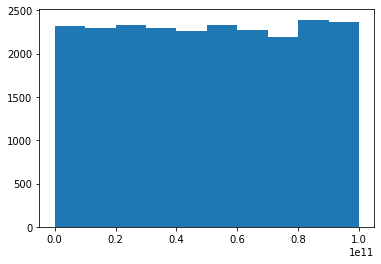

In [29]:
plt.hist(customer_final['transaction_id'])

(array([2184., 2226., 2482., 2365., 2363., 2342., 2289., 2265., 2175.,
        2362.]),
 array([266783. , 267631.2, 268479.4, 269327.6, 270175.8, 271024. ,
        271872.2, 272720.4, 273568.6, 274416.8, 275265. ]),
 <BarContainer object of 10 artists>)

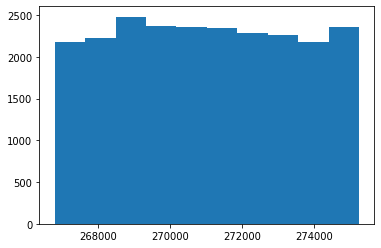

In [30]:
plt.hist(customer_final['cust_id'])

(array([ 457.,  458.,  405.,  438.,  419.,    0., 4214., 4123., 4174.,
        8365.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

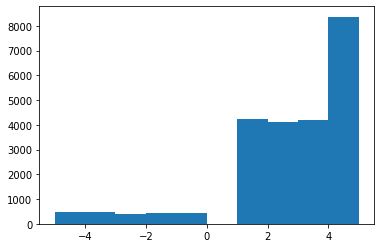

In [31]:
plt.hist(customer_final['Qty'])

(array([ 496.,  446.,  464.,  411.,  360., 3413., 4335., 4336., 4349.,
        4443.]),
 array([-1.4990e+03, -1.1991e+03, -8.9920e+02, -5.9930e+02, -2.9940e+02,
         5.0000e-01,  3.0040e+02,  6.0030e+02,  9.0020e+02,  1.2001e+03,
         1.5000e+03]),
 <BarContainer object of 10 artists>)

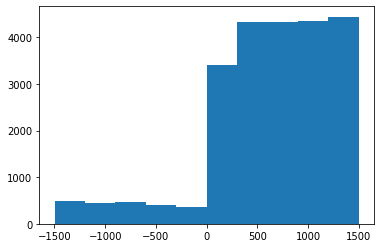

In [32]:
plt.hist(customer_final['Rate'])

(array([4868., 5303., 3023., 2944., 1912., 1823., 1078., 1058.,  523.,
         521.]),
 array([  7.35 ,  85.365, 163.38 , 241.395, 319.41 , 397.425, 475.44 ,
        553.455, 631.47 , 709.485, 787.5  ]),
 <BarContainer object of 10 artists>)

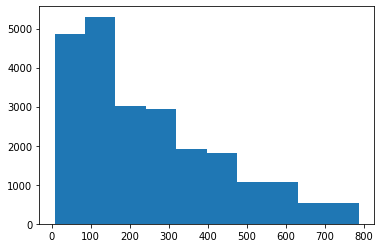

In [33]:
plt.hist(customer_final['Tax'])

(array([ 109.,  231.,  360.,  564.,  913., 9062., 5505., 3435., 1930.,
         944.]),
 array([-8270.925 , -6615.0825, -4959.24  , -3303.3975, -1647.555 ,
            8.2875,  1664.13  ,  3319.9725,  4975.815 ,  6631.6575,
         8287.5   ]),
 <BarContainer object of 10 artists>)

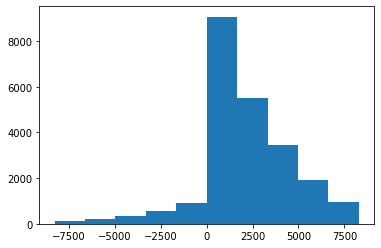

In [34]:
plt.hist(customer_final['total_amt'])

In [35]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

<AxesSubplot:>

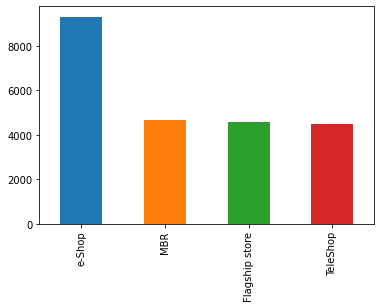

In [36]:
customer_final['Store_type'].value_counts().plot(kind='bar')
#sns.countplot(customer_final['Store_type'])

<AxesSubplot:>

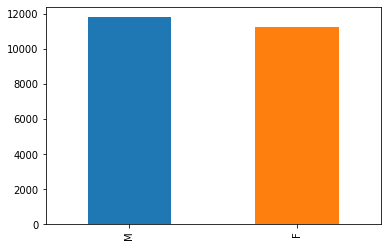

In [37]:
customer_final['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

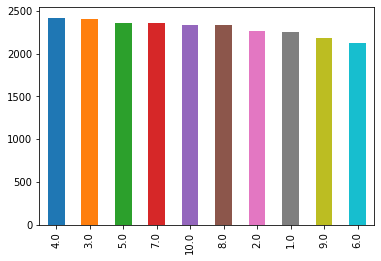

In [38]:
customer_final['city_code'].value_counts().plot(kind='bar')

<AxesSubplot:>

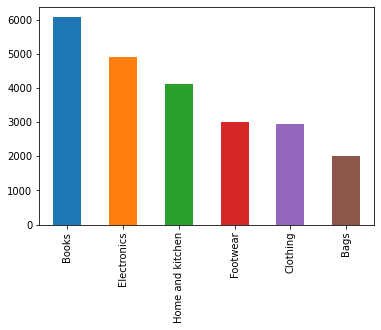

In [39]:
customer_final['prod_cat'].value_counts().plot(kind='bar')

<AxesSubplot:>

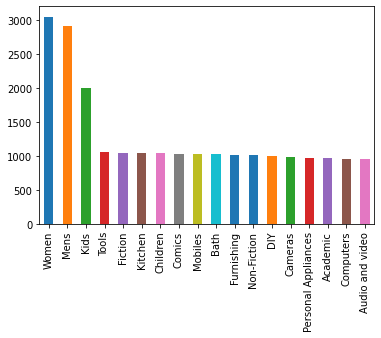

In [40]:
customer_final['prod_subcat'].value_counts().plot(kind='bar')

## 4.a. Time Period of available Transaction Data

In [41]:
customer_final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY


In [44]:
print(min(customer_final['tran_date']))
print(max(customer_final['tran_date']))

2011-01-02 00:00:00
2014-12-02 00:00:00


## 4.b. Count of transaction where total amount is negative

In [46]:
customer_final[customer_final['total_amt']<0].shape[0]

2177

## 5. Product Categories popular among Females vs Males

In [47]:
df_males = customer_final[customer_final['Gender']=='F']
df_females = customer_final[customer_final['Gender']=='M']

<AxesSubplot:>

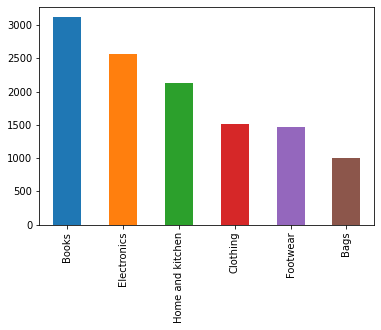

In [48]:
df_females['prod_cat'].value_counts().plot(kind='bar')

<AxesSubplot:>

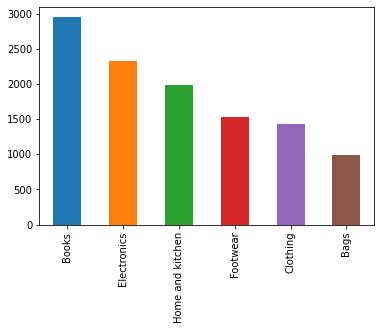

In [49]:
df_males['prod_cat'].value_counts().plot(kind='bar')

Books and Electronics seems to be most popular among both Males and Females. Clothing seems to be less popular for Males comparitively.

   ## 6. Which city code has maximum customers and %

In [57]:
customer_final['city_code'].value_counts().sort_values()

6.0     2127
9.0     2178
1.0     2258
2.0     2270
8.0     2330
10.0    2333
7.0     2356
5.0     2360
3.0     2411
4.0     2422
Name: city_code, dtype: int64

### City Code 6 has the maximum customers.

In [53]:
np.sum(customer_final['city_code'].value_counts())

23045

In [58]:
2127*100/23045

9.229767845519635

### Which is equal to 9.23% of total customers

## 7. Which store type sells the maximum products by value and by quantity

In [59]:
store = customer_final.groupby('Store_type')

In [60]:
store.sum()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
Store_type,,,,,,,,,
Flagship store,225970578122635,1240362132,28462,17257,11133,2941557,1149541.050,9.715688e+06,25121.0
MBR,231810120127223,1263521127,28494,17481,11194,2953253,1153820.535,9.674486e+06,25587.0
TeleShop,227645577540914,1220648927,27310,16906,10984,2834420,1096699.485,9.364781e+06,24544.0
e-Shop,468917666912587,2523332136,57489,35119,22763,5941001,2332463.700,1.982482e+07,51093.0


### Both by value and by quantity e-shop sells the maximum products

## 8. Total amount earned from Electronics and Clothing categories  from Flagship store

In [61]:
customer_final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY


In [62]:
flagship = customer_final.groupby(['Store_type','prod_cat'])

In [63]:
flagship.sum()

transaction_id    cust_id  prod_subcat_code  \
Store_type     prod_cat                                                         
Flagship store Bags               19700148114277  105391623               977   
               Books              60242398464953  331569608             10115   
               Clothing           28330173910382  158230561              1548   
               Electronics        49926827325502  269953789              7053   
               Footwear           27406336907476  155548680              1603   
               Home and kitchen   40364693400045  219667871              7166   
MBR            Bags               20907292343229  113299393              1060   
               Books              61188717455182  331793888              9943   
               Clothing           31413743434255  169734285              1614   
               Electronics        46499215899149  258196819              6956   
               Footwear           30602065243198  165089401              1631   
               Home and kitchen   41199085752210  225407341              7290   
TeleShop       Bags               21143416878987  111017041              1001   
               Books              58829392140925  318407224              9375   
               Clothing           28756580556805  156160451              1545   
               Electronics        48968379520069  257215735              6796   
               Footwear           30540601493354  162339396              1607   
               Home and kitchen   39407206950774  215509080              6986   
e-Shop         Bags               37725947580641  211515385              1945   
               Books             123486583821228  663163958             19924   
               Clothing           59960890254925  318168986              3130   
               Electronics       100263268135237  542225448             14270   
               Footwear           62645682066986  329816945              3281   
               Home and kitchen   84835295053570  458441414             14939   

                                 prod_cat_code   Qty     Rate         Tax  \
Store_type     prod_cat                                                     
Flagship store Bags                       1556   970   261492   99997.485   
               Books                      6115  2865   772067  299456.430   
               Clothing                    584  1394   359103  145713.960   
               Electronics                2988  2492   653261  262251.360   
               Footwear                   1148  1413   365559  144638.760   
               Home and kitchen           4866  1999   530075  197483.055   
MBR            Bags                       1672   983   253368  106210.755   
               Books                      6120  2929   748512  307585.845   
               Clothing                    626  1423   401957  156299.955   
               Electronics                2859  2421   634268  236854.485   
               Footwear                   1218  1381   353303  141449.595   
               Home and kitchen           4986  2057   561845  205419.900   
TeleShop       Bags                       1640   910   243535   97628.055   
               Books                      5875  2901   772209  285749.520   
               Clothing                    576  1456   363386  151652.760   
               Electronics                2847  2330   598387  227273.235   
               Footwear                   1198  1453   377926  146354.670   
               Home and kitchen           4770  1934   478977  188041.245   
e-Shop         Bags                       3124  1845   494022  194305.755   
               Books                     12235  5974  1577607  622525.365   
               Clothing                   1174  2901   755537  296808.435   
               Electronics                6000  5065  1308120  505540.665   
               Footwear                   2434  3027   793166  302031.030   
  

### Total amount as encircled in the below image
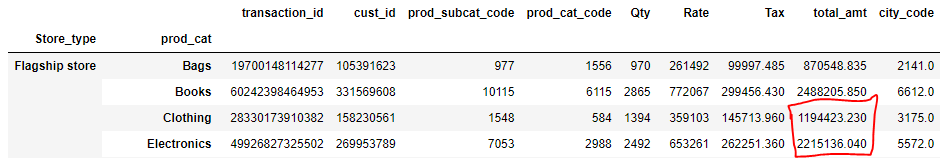

## 9. Total_amt earned from Male customers under Electronics Category

In [64]:
male_electronics = customer_final.groupby(['Gender','prod_cat'])

In [65]:
male_electronics.sum()

transaction_id    cust_id  prod_subcat_code  \
Gender prod_cat                                                         
F      Bags               51614407828372  269243020              2524   
       Books             148305889080431  799187646             24221   
       Clothing           71109333293556  389981108              3839   
       Electronics       116505229133220  630869418             16731   
       Footwear           77769922115219  414306912              4145   
       Home and kitchen  101044968687610  540256910             17650   
M      Bags               47862397088762  271980422              2459   
       Books             155248406987065  844669382             25102   
       Clothing           77151815716219  411511578              3993   
       Electronics       129152461746737  696722373             18344   
       Footwear           73400422834502  398215884              3973   
       Home and kitchen  104705357154390  578497170             18720   

                         prod_cat_code   Qty     Rate         Tax  \
Gender prod_cat                                                     
F      Bags                       3976  2362   625290  253984.500   
       Books                     14745  7070  1866671  742772.415   
       Clothing                   1439  3425   901789  367465.035   
       Electronics                6984  5832  1502156  573641.250   
       Footwear                   3058  3716   972920  372961.890   
       Home and kitchen          11964  4895  1253921  487460.505   
M      Bags                       4016  2346   627127  244157.550   
       Books                     15580  7587  2000564  771401.715   
       Clothing                   1518  3748   977916  382673.445   
       Electronics                7710  6476  1691880  658278.495   
       Footwear                   2938  3555   916265  361269.930   
       Home and kitchen          12804  5041  1328486  514190.670   

                           total_amt  city_code  
Gender prod_cat                                  
F      Bags              2077985.650     5656.0  
       Books             6164692.235    16191.0  
       Clothing          3026750.805     7965.0  
       Electronics       5019354.210    12727.0  
       Footwear          3202552.990     8501.0  
       Home and kitchen  4132177.335    10935.0  
M      Bags              2046722.990     5460.0  
       Books             6645972.775    16727.0  
       Clothing          3224079.495     8316.0  
       Electronics       5703109.425    14058.0  
       Footwear          3014672.050     8347.0  
       Home and kitchen  4301075.480    11428.0

### Total amount earned from Males in Electronics category is 5703109.425	

## 10. How many customers have 10 unique transactions after removing -ve amounts

In [66]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers


In [67]:
customer_final_non_neg = customer_final[customer_final['total_amt']>=0]

In [69]:
customer10 = customer_final_non_neg.groupby('cust_id')

In [78]:
customer10.count().sort_values('transaction_id', ascending=False).head(10)

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
cust_id,,,,,,,,,,,,,,
272741,11,11,11,11,11,11,11,11,11,11,11,11,11,11
273014,11,11,11,11,11,11,11,11,11,11,11,11,11,11
266794,11,11,11,11,11,11,11,11,11,11,11,11,11,11
274227,11,11,11,11,11,11,11,11,11,11,11,11,11,11
270803,11,11,11,11,11,11,11,11,11,11,11,11,11,11
270535,11,11,11,11,11,11,11,11,11,11,11,11,11,11
267768,10,10,10,10,10,10,10,10,10,10,10,10,10,10
271565,10,10,10,10,10,10,10,10,10,10,10,10,10,10
267346,10,10,10,10,10,10,10,10,10,10,10,10,10,10


### From the above table, we can see that there are 6 customers with more than 10 unique purchases

## 11. For Customers Aged between 25 - 35 -> total amt spent on Electronics and Books

In [80]:
customer_final_1 = customer_final[(customer_final['DOB']>'1980-01-01') & (customer_final['DOB']<'1990-01-01')]

In [82]:
group2535 = customer_final_1.groupby('prod_cat')

In [83]:
group2535.sum()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
prod_cat,,,,,,,,,
Bags,43366785816444,230132230,2062,3400,2058,535150,213579.765,1795619.475,4651.0
Books,131325264553215,715632268,21517,13200,6381,1666124,661688.055,5546756.345,14185.0
Clothing,65395593979044,358253990,3496,1322,3290,857186,333477.480,2869978.930,7315.0
Electronics,108362863209962,585921986,15577,6486,5446,1435538,540341.025,4780113.975,11669.0
Footwear,65777998159569,350497642,3475,2586,3193,847934,312041.310,2758676.700,7313.0
Home and kitchen,91729097377283,492916071,15995,10914,4389,1128224,444940.650,3703794.250,9760.0


### 11.a. Total amount spent for Electronics is 4780113.975 and amount spent for Books is 5546756.345

In [85]:
customer_final_2 = customer_final_1[(customer_final_1['tran_date']>'2014-01-01') & (customer_final_1['tran_date']<'2014-03-01')]

In [86]:
sum(customer_final_2['total_amt'])

583127.2850000006

### 11.b Total amount spent between Jan and March is 583127.285